### Import necessary Python libraries for the project

In [97]:
import pandas as pd  
import numpy as np  # Arithmetic calculation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Data loading and Validation

In [98]:
# Load data into python
df=pd.read_csv('C:/Users/loruf/Downloads/DTC/asswk8/App_user_engagement.csv')


In [99]:
# Data validation: Top 5 rows
df.head()

,Spend,App Users clicks
0,22.61,165
1,37.28,228
2,55.57,291
3,45.42,247
4,50.22,290


In [100]:
# Data validation: Bottom 5 rows
df.tail()

,Spend,App Users clicks
35,65.26,412
36,50.17,286
37,85.14,479
38,91.51,592
39,65.33,362


### Data Cleaning

In [69]:
# Check for missing values
df.isnull()


,Spend,App Users clicks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [70]:
#Check for duplicate values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

### One hot encoding

In [71]:
# correlation between App user clicks and  Ads spend
df.corr()

,Spend,App Users clicks
Spend,1.000000,0.972575
App Users clicks,0.972575,1.000000


In [72]:
# Check the info of datasets
df.info()
#check first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Spend             40 non-null     float64
 1   App Users clicks  40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


,Spend,App Users clicks
0,22.61,165
1,37.28,228
2,55.57,291
3,45.42,247
4,50.22,290


### Data Preprocessing and EDA

In [73]:

#Descriptive Statistics 

dt1 = df.loc[:,]
dt1.describe()

,Spend,App Users clicks
count,40.000000,40.000000
mean,48.145750,284.225000
std,22.679736,139.346918
min,1.120000,48.000000
25%,32.667500,176.500000
50%,48.235000,287.000000
75%,63.590000,356.250000
max,91.510000,593.000000


In [74]:
# Scale values using standard scaler
from sklearn.preprocessing import StandardScaler
# create an object
scaler= StandardScaler()

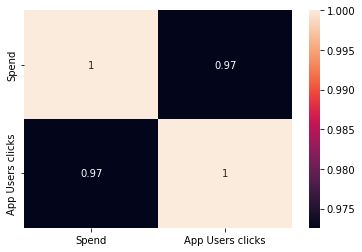

In [75]:
#heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df[['Spend','App Users clicks']].corr(),annot=True)
plt.show()

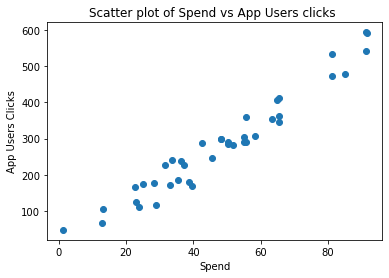

In [76]:
#scatter plot ROAS vs spend
plt.scatter(df['Spend'], df['App Users clicks'])
plt.xlabel("Spend")
plt.ylabel("App Users Clicks")
plt.title("Scatter plot of Spend vs App Users clicks ")
plt.show()

### Build machine learning model

In [77]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [78]:
#Validate data
df.head()

,Spend,App Users clicks
0,22.61,165
1,37.28,228
2,55.57,291
3,45.42,247
4,50.22,290


In [79]:
# input and predictor variable
X=df.drop(['App Users clicks'],axis=1)
Y=df['App Users clicks']


In [80]:
# Split into  80% train and 20% test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [81]:
# Check the data shape after splitting
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((32, 1), (8, 1), (32,), (8,))

### Model Training

In [82]:
# fit training data to model
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [83]:
print (regressor.intercept_)
print (regressor.coef_)

-4.863875223198363
[5.9848097]


### Model Testing

In [87]:
#Check prediction score
regressor.score(X_test,Y_test)

0.93172722814936

-- The score is 0.029 which is 3% not good. Above 50% is good.

In [89]:
#Get predicted y
y_pred=regressor.predict(X_test)

In [91]:
# Check predictions where accuracy levels is achieved
y_test=np.array(list(Y_test))
y_pred=np.array(y_pred)
df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,226,183.777327
1,175,144.876064
2,303,323.881722
3,290,295.693268
4,355,373.256402
5,291,325.078684
6,126,133.026140
7,533,481.581458


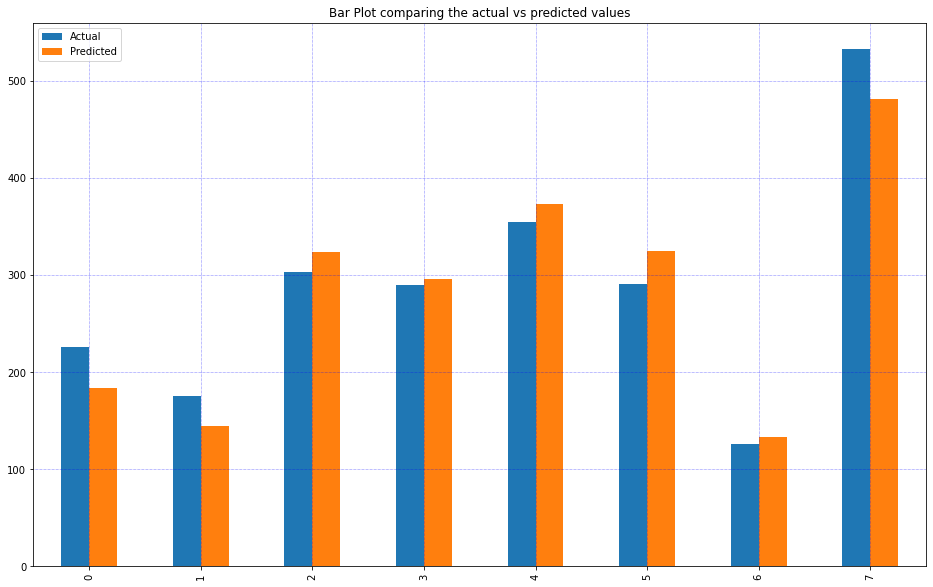

In [95]:
#Visual with 1st 25 values
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='blue')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='blue')
plt.title("Bar Plot comparing the actual vs predicted values")
plt.show()

### Key Insight from visual
There is a high variance in the model. There are lots of inaccuracies or error rate is high.

### Model Evaluation

In [102]:
# Calculate error of the model
print('Mean Absolute Error', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('r2', metrics.r2_score(y_true=y_test,y_pred=y_pred))

Mean Absolute Error 26.212671025942516
Mean Squared Error 918.3189192079349
Root Mean Squared Error 5.119831152093057
r2 0.93172722814936


### Random Forest Algorithm

### Model Training

In [40]:
#import libraries
from sklearn.ensemble import RandomForestRegressor

In [41]:
# fit training data to model
forest_regressor=RandomForestRegressor()
forest_regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [42]:
from sklearn.model_selection import cross_val_score
cv_10_results= cross_val_score(forest_regressor,X,Y,cv=10)
print (cv_10_results)

[0.80417866 0.91892743 0.67751894 0.94455383 0.99001128 0.94244577
 0.91230776 0.998521   0.42331252 0.98383413]


In [59]:
# Train algorithm using 10k trees
forest_regressor=RandomForestRegressor(n_estimators=10000,random_state=0,n_jobs=-1)
forest_regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10000, n_jobs=-1, random_state=0)

In [44]:
# Test the model
y_pred=forest_regressor.predict(X_test)

In [45]:
# Check predictions where accuracy levels is achieved
y_test=np.array(list(Y_test))
y_pred=np.array(y_pred)
df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,3.77,4.091005
1,7.41,6.081967
2,22.08,21.886865
3,3.60,3.953748
4,8.95,9.031685
...,...,...
195,11.36,11.541585
196,1.32,1.329646
197,204.08,197.076816
198,1.74,1.820392


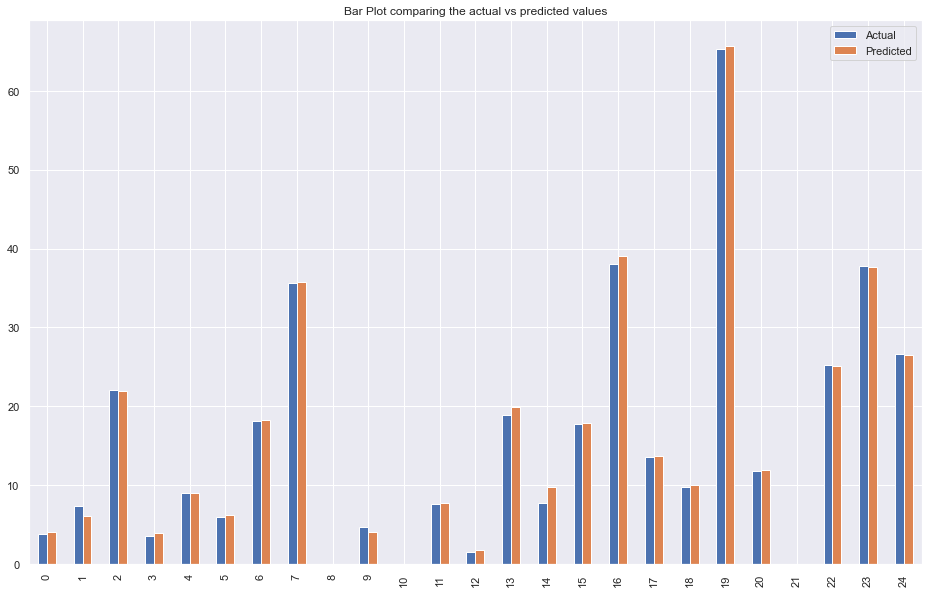

In [46]:
#Visual with 1st 25 values
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title("Bar Plot comparing the actual vs predicted values")
#plt.title("Bar plot comparing actual and predicted values")
plt.show()

### Model Evaluation

In [47]:
# Calculate error of the model
print('Mean Absolute Error', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('r2', metrics.r2_score(y_true=y_test,y_pred=y_pred))

Mean Absolute Error 3.57525263000009
Mean Squared Error 878.3712456119695
Root Mean Squared Error 1.8908338451593494
r2 0.6859181328925501
